In [264]:
import numpy as np
from scipy.special import erf
from scipy.special import erfc
from math import sqrt,exp
from scipy.integrate import quad
import matplotlib.pylab as plt
import random


# %% Probability distributions of eigenvalues
def p_lambda1(lambda1,sigma):
    los = lambda1/sigma
    ret = sqrt(5)/(12*np.pi*sigma)*(20*los*exp(-9/2*los**2)-\
        sqrt(2*np.pi)*exp(-5/2*los**2)*(1-20*los**2)*(erf(sqrt(2)*los)+1)+\
        3*sqrt(3*np.pi)*exp(-15/4*los**2)*(erf(sqrt(3)/2*los)+1))
    return ret
p_lambda1_vec = np.vectorize(p_lambda1)

def p_lambda2(lambda2,sigma):
    los = lambda2/sigma
    ret = sqrt(15)/(2*sqrt(np.pi)*sigma)*exp(-15/4*los**2)
    return ret
p_lambda2_vec = np.vectorize(p_lambda2)

def p_lambda3(lambda3,sigma):
    los = lambda3/sigma
    ret = -sqrt(5)/(12*np.pi*sigma)*(20*los*exp(-9/2*los**2)+\
        sqrt(2*np.pi)*exp(-5/2*los**2)*(1-20*los**2)*(erfc(sqrt(2)*los))-\
        3*sqrt(3*np.pi)*exp(-15/4*los**2)*(erfc(sqrt(3)/2*los)))
    return ret
p_lambda3_vec = np.vectorize(p_lambda3)

def p_lambda123(lambda1,lambda2,lambda3,sigma):
    I1 = lambda1+lambda2+lambda3
    I2 = lambda1*lambda2+lambda2*lambda3+lambda3*lambda1
    ret = 3375.0/(8*sqrt(5)*np.pi*sigma**6)*\
        exp(-3*I1**2/sigma**2+15*I2/2/sigma**2)*\
        (lambda2-lambda1)*(lambda3-lambda2)*(lambda3-lambda1)
    return ret

def p_lambda3_l3c_delta(lambda3, l3c, delta, sigma):
    dif = delta-3*l3c
    ret = (-3/4*np.sqrt(10/np.pi)/sigma)*dif*np.exp(-5*dif**2/8/sigma**2)+0.5*(erf(dif*np.sqrt(10)/(4*sigma))+erf(dif*np.sqrt(10)/(2*sigma)))*np.heavyside(dif)
    return ret

def p_rho(rho,sigma):
    def bt(n,s):
        output= s * sqrt(5) *( 0.5 + np.cos( np.pi*2.0*(n-1)/3.0   + np.arccos( 54/rho/s**3 -1.0 )/3.0 ) )
        return output
    def myintegrand(s):
        output = (9* sqrt(5**3) )/(4*np.pi* rho**2 * sigma**4)* exp(-((s-3.0)**2.0) /( 2 * sigma**2 )) *( 1+ exp(- 6*s/sigma**2 ) ) * (
            exp( -bt(1,s)**2/( 2 * sigma**2 ) )+exp(-bt(2,s)**2/( 2 * sigma**2 ))-exp(-bt(3,s)**2/( 2 * sigma**2 )))
        return output
    solution = quad(myintegrand,3/np.cbrt(rho),np.inf)
    return solution
p_rho_vec = np.vectorize(p_rho)

def samplelambda(sigma):
    #sample lambda1,2,3 so that they follow distribution of p_lambda123
    pdfmax=2.4/sigma**3 # approximate maximum of p_lambda123
    lambda1min=-2*sigma
    lambda1max=2*sigma
    lambda2min=-2.5*sigma
    lambda2max=1.5*sigma
    lambda3min=-1.5*sigma
    lambda3max=2.5*sigma
    while True: # try until a sample is accepted
        l1=random.uniform(lambda1min,lambda1max)
        l2=random.uniform(lambda2min,lambda2max)
        l3=random.uniform(lambda3min,lambda3max)
        y=random.uniform(0,pdfmax)
        #print([l1,l2,l3,y,p_lambda123(l1,l2,l3,sigma)])
        if y<p_lambda123(l1,l2,l3,sigma) and (l1<l2) and (l2<l3):
            return np.array([l1,l2,l3,y])

In [244]:
mysigma=1

In [245]:
lambda_range=np.arange(-3*mysigma,3*mysigma,0.05*mysigma)

In [247]:
rho_range_lin=np.arange( 0.1,50, 0.1 )
rho_range_log=np.power(10.0,np.arange( -2,5, 0.02 ))

In [132]:
sampleset=[]
for i in range(660000):
    if i%4000==0:
        print(i)
    sampleset.append(samplelambda(mysigma))

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000
52000
56000
60000
64000
68000
72000
76000
80000
84000
88000
92000
96000
100000
104000
108000
112000
116000
120000
124000
128000
132000
136000
140000
144000
148000
152000
156000
160000
164000
168000
172000
176000
180000
184000
188000
192000
196000
200000
204000
208000
212000
216000
220000
224000
228000
232000
236000
240000
244000
248000
252000
256000
260000
264000
268000
272000
276000
280000
284000
288000
292000
296000
300000
304000
308000
312000
316000
320000
324000
328000
332000
336000
340000
344000
348000
352000
356000
360000
364000
368000
372000
376000
380000
384000
388000
392000
396000
400000
404000
408000
412000
416000
420000
424000
428000
432000
436000
440000
444000
448000
452000
456000
460000
464000
468000
472000
476000
480000
484000
488000
492000
496000
500000
504000
508000
512000
516000
520000
524000
528000
532000
536000
540000
544000
548000
552000
556000
560000
564000
568000
572000
576000
580000
584000
58

In [133]:
sampleset=np.array(sampleset)

In [134]:
sampleset=sampleset.transpose()

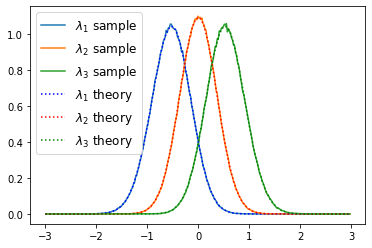

In [277]:
tmp1=np.histogram(sampleset[0],bins=np.arange(-3*mysigma,3*mysigma,0.02),density=True)
tmp2=np.histogram(sampleset[1],bins=np.arange(-3*mysigma,3*mysigma,0.02),density=True)
tmp3=np.histogram(sampleset[2],bins=np.arange(-3*mysigma,3*mysigma,0.02),density=True)
lambdaxaxis=(tmp1[1][0:-1]+tmp1[1][1:len(tmp1[1])])/2

plt.plot(lambdaxaxis,tmp1[0],label='$\\lambda_1$ sample')
plt.plot(lambdaxaxis,tmp2[0],label='$\\lambda_2$ sample')
plt.plot(lambdaxaxis,tmp3[0],label='$\\lambda_3$ sample')

plt.plot(lambda_range,p_lambda3_vec(lambda_range,mysigma),'b:',label='$\\lambda_1$ theory')
plt.plot(lambda_range,p_lambda2_vec(lambda_range,mysigma),'r:',label='$\\lambda_2$ theory')
plt.plot(lambda_range,p_lambda1_vec(lambda_range,mysigma),'g:',label='$\\lambda_3$ theory')

plt.legend(fontsize=12)

In [287]:
rhos=np.abs(1/((1+sampleset[0])*(1+sampleset[1])*(1+sampleset[2])))

Text(0, 0.5, '$P(\\rho)$')

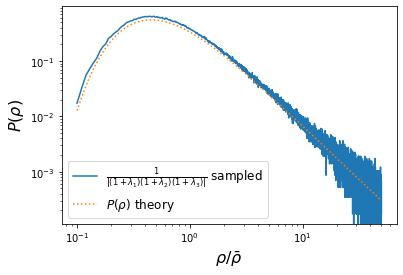

In [285]:
# pdf

dm,rhobins=np.histogram(rhos,bins=np.arange( 0.1,50, 0.01 ),density=True)
rhoxaxis=rhobins[0:dm.shape[0]]

plt.plot(rhoxaxis,dm,label='$\\frac{1}{|(1+\\lambda_1)(1+\\lambda_2)(1+\\lambda_3)|}$ sampled')
plt.loglog(rhoxaxis,p_rho_vec(rhoxaxis,mysigma)[0],':',label='$P(\\rho)$ theory')
plt.legend(fontsize=12)
plt.xlabel('$\\rho/\\bar \\rho $',fontsize=16)
plt.ylabel('$P(\\rho)$',fontsize=16)


In [284]:
# the p_rho is not correctly normalized to 1 so that in this plot theory and sample are slightly shifted
rhoxaxis=np.power(10.0,np.arange( -5,5, 0.01 ))
np.trapz(p_rho_vec(rhoxaxis,mysigma)[0],x=rhoxaxis)

0.8873008806868145

Text(0, 0.5, '$ dM/ d\\log \\rho $')

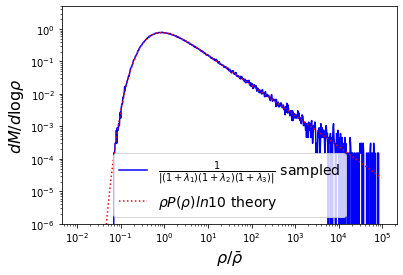

In [286]:
dm,rhobins=np.histogram(rhos,bins=np.power(10.0,np.arange( -2,5, 0.01 )))
dlogrho=(np.log10(rhobins)[1]-np.log10(rhobins)[0]) # note that it's log10 
rhoxaxis=rhobins[0:dm.shape[0]]

plt.loglog(rhoxaxis,dm/dlogrho/len(rhos),'b',label='$\\frac{1}{|(1+\\lambda_1)(1+\\lambda_2)(1+\\lambda_3)|}$ sampled') 
plt.loglog(rhoxaxis,rhoxaxis*p_rho_vec(rhoxaxis,mysigma)[0]*np.log(10),'r:',label='$ \\rho P(\\rho) ln 10 $ theory')
plt.ylim(1e-6,5)
plt.legend(fontsize=14)
plt.xlabel('$\\rho/\\bar {\\rho}$',fontsize=16)
plt.ylabel('$ dM/ d\\log \\rho $',fontsize=16)